# Assignment on Transient flow 
Pranisha Pokhrel 

1058713 

Hydrology and water Resources

## Situation of well
A large construction is to be realized next to a river that is in direct contact with the aquifer next to it. The building pit measures 50x50 m and river side is at 400 m distance from the river shore.

Aquifer properties are given below

    kD = 900 m2/d is Transmissivity
    S = 0.25 [-] is storativity
    
Two extraction wells are used at the corners of the building pit.

The drawdown everywhere in the building pit must be at least 5 m, to be reached within one month of pumping.

The pumping will continue after this month for 5 more months during which the drawdown is to be maintained. However the pumping can be reuced after the first month. Adjust the pumping once per month, such that at the end of each month the darwdown fullfils the requied 5 m.

After 6 months, pumping is stopped, so that the water levels can restore

The current situation as described by the assignment 
    ![Situation](situation2019.png)
    

### 1. On which two corners of the builing pit should you place the two extraction wells to have most effect.

We know, 

Theis well drawdown is

$$ s = \frac {Q_0} {4 \pi kD} W(u) $$

where,

$$ W(u) = exp1(u)$$

the exponential integral, and

$$ u = \frac {r^2 S} { 4 kD t} $$



The flow from the drawdown for a well ring with radius $r$ can be calculated by taking derivative with respect to distance which yields:

$$ Q_r = Q_0 e^{-u} $$


We can see that u is proportional to square of r (distance), with the above formula discharge at distance r diminishes exponentially with distance from the well.

Therefore, to have the most effect, the extraction wells should be placed at the two corners of the building pit that are near to the river.

### 2. Find the most critical point and make sure that the drawdown is as required at that point.

As well is near a river that is in good contact with the aquifer next to it and we assume that the aquifer extends to infinity for the rest.
To understand the well relation to the river which causes constant head in the groundwater, we need a mirror well (injecting well) at the opposite side of river with opposite discharge. Let's aasume a mirror well as shown in figure below.



##### Figure

Assume the river is straight along the y axis, and that the wells which has a constant extraction $Q_0$ starting at $t=0$ are at points: $$A(-400,\, 50)$$ and $$B(-400,\, 0)$$ 

The other two sides of square are: $$C(-450,\,0)$$ and $$D(-450,\,50)$$

We just place injecting wells with opposite flow at the other side of the river, at points $$A'(400,\, 50)$$ and $$B'(400,\, 0 )$$

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.special as sp #theis well function
from scipy.special import erfc
W= sp.exp1

# Aquifer properties
kD= 900  #[m2/d] is Transmissivity
S= 0.25  # [-] is Storativity
xr= 400  #[m] distance from the river
l= 50    #[m ]length of square
r0= 0.3  #[m] assumed well radius 
t= 30    # [d] 1 month duration
s= 5     # [m] required drawdown

#let's find the drawdown at point midpoint of square E(-400,25) and F(-450,250) and
#also at the corners of the square distant to the river C(-450,0) and D(-450,50)

#Flow QE for drawdown s(5m) at mid-point E(-400,25)
rE1 = l/2 #distance from  extration well at A
rE2 = l/2 #distance from extration well at B
rE3 = np.sqrt ((2*xr)**2+ (l/2)**2) #distance from injection well at A'
rE4 = np.sqrt ((2*xr)**2+ (l/2)**2) #distance from injection well at B'

uE1 = rE1 ** 2 * S / (4 * kD * t) 
uE2 = rE2 ** 2 * S / (4 * kD * t)
uE3 = rE3 ** 2 * S / (4 * kD * t)
uE4 = rE4 ** 2 * S / (4 * kD * t)

#Using Superposition,
QE = s*(4 * np.pi * kD) / (W(uE1) + W(uE2)- W(uE3)- W(uE4)) # minus injecting wells 


#Flow QF for drawdown s(5m) at mid-point F(-450,25)
rF1 = np.sqrt((l/2)**2 + l**2) #distance from  extration well at A
rF2 = np.sqrt((l/2)**2 + l**2) #distance from extration well at B
rF3 = np.sqrt ((2*xr+l)**2+ (l/2)**2) #distance from injection well at A'
rF4 = np.sqrt ((2*xr+l)**2+ (l/2)**2) #distance from injection well at B'

uF1 = rF1 ** 2 * S / (4 * kD * t) 
uF2 = rF2 ** 2 * S / (4 * kD * t)
uF3 = rF3 ** 2 * S / (4 * kD * t)
uF4 = rF4 ** 2 * S / (4 * kD * t)

#Using Superposition,
QF = s*(4 * np.pi * kD) / (W(uF1) + W(uF2)- W(uF3)- W(uF4)) # minus injecting wells 


#Flow QF for drawdown s(5m) at C(-450,0) 
rC1 = np.sqrt(l**2 + l**2) #distance from  extration well at A
rC2 = l                    #distance from extration well at B
rC3 = np.sqrt ((2*xr+l)**2+ l**2) #distance from injection well at A'
rC4 = 2*xr+l                      #distance from injection well at B'

uC1 = rC1 ** 2 * S / (4 * kD * t) 
uC2 = rC2 ** 2 * S / (4 * kD * t)
uC3 = rC3 ** 2 * S / (4 * kD * t)
uC4 = rC4 ** 2 * S / (4 * kD * t)

#Using Superposition,
QC = s*(4 * np.pi * kD) / (W(uC1) + W(uC2)- W(uC3)- W(uC4)) # minus injecting wells 


#Flow QF for drawdown s(5m) at D(-450,50) 
rD1 = l #distance from  extration well at A
rD2 = np.sqrt(l**2 + l**2) #distance from extration well at B
rD3 = 2*xr+l               #distance from injection well at A'
rD4 = np.sqrt ((2*xr+l)**2+ l**2)  #distance from injection well at B'

uD1 = rD1 ** 2 * S / (4 * kD * t) 
uD2 = rD2 ** 2 * S / (4 * kD * t)
uD3 = rD3 ** 2 * S / (4 * kD * t)
uD4 = rD4 ** 2 * S / (4 * kD * t)

#Using Superposition,
QD = s*(4 * np.pi * kD) / (W(uD1) + W(uD2)- W(uD3)- W(uD4)) # minus injecting wells 



print("In order to maintain the drawdown s= {:.1f} m, the extraction rate at:\
 E (-400,25) is QE={:.0f} m3/day, F(-450,25) is QF= {:.0f} m3/day,\
 C(-450,0) is QC= {:.0f} m3/day, D(-450,50) is QD= {:.0f} m3/day "\
.format (s,QE, QF, QC, QD))




In order to maintain the drawdown s= 5.0 m, the extraction rate at: E (-400,25) is QE=4825 m3/day, F(-450,25) is QF= 6604 m3/day, C(-450,0) is QC= 6797 m3/day, D(-450,50) is QD= 6797 m3/day 


From the results we can see that the most critical points are $C$ and $D$. In order to maintain the drawdown $ 5 \,m  $ at C and D, the extraction rate of all the wells should be maintained to  $Q_0$ $ = $ $Q_D$ $ = $ $Q_C$ $= 6797 \,\  m^3/day $


### 3. Show the extraction as a function of time form the start until one year after the stop. Also plot the drawdown at the critical location for this period.

In [12]:
#2nd month drawdown S2 at edge D(-450,50) of the building pit which is the critical point
t2 = 60 #[days]
rD1 = l #distance from  extration well at A
rD2 = np.sqrt(l**2 + l**2) #distance from extration well at B
rD3 = 2*xr+l               #distance from injection well at A'
rD4 = np.sqrt ((2*xr+l)**2+ l**2)  #distance from injection well at B'

uD1 = rD1 ** 2 * S / (4 * kD * t2) 
uD2 = rD2 ** 2 * S / (4 * kD * t2)
uD3 = rD3 ** 2 * S / (4 * kD * t2)
uD4 = rD4 ** 2 * S / (4 * kD * t2)

#Using Superposition,
s2 = QD/(4 * np.pi * kD) * (W(uD1) + W(uD2)- W(uD3)- W(uD4)) # minus injecting wells 

print("Second month drawdown is s2= {:.2f} m for initial extraction rate at Q0= {:.0f} m3/day "\
.format (s2,QD))
print(s2)

Second month drawdown is s2= 5.57 m for initial extraction rate at Q0= 6797 m3/day 
5.572015969304188


We can see that, if we continue the pumping at same rate $Q_0 \,\ (6797 \,\ m^3/day)$, the drawdown even in the critical point is going to be $ 5.6 \,\  meters $ for the second month. Therefore, drawdown 's' must be adjusted for each month so that drawdown fulfills the required $5 \,\ meters$ and not be overpumped at the same time.


In [17]:
# for compensating the excess drawdown, extraction rate must be changed to Q2 for second month
sexcess= s2-s
tt=30
uD1 = rD1 ** 2 * S / (4 * kD * tt) 
uD2 = rD2 ** 2 * S / (4 * kD * tt)
uD3 = rD3 ** 2 * S / (4 * kD * tt)
uD4 = rD4 ** 2 * S / (4 * kD * tt)


#Using Superposition,
Qexcess =sexcess*(4 * np.pi * kD) / (W(uD1) + W(uD2)- W(uD3)- W(uD4)) # minus injecting wells

Q2= QD-Qexcess

print("In order to maintain the drawdown s= {:.1f} m, the extraction rate for second month should be Q2 = {:.0f} m3/day"\
.format (s,QD-Qexcess))



In order to maintain the drawdown s= 5.0 m, the extraction rate for second month should be Q2 = 6020 m3/day


#### Extraction as the function of time (Take to loop)

50 70.71 850 851.47
[6797.2899837977475, 6099.488965253778, 5847.552517815787, 5717.777449777796, 5638.685282602624, 5585.445677855919]
[4.999999999999999, 5.0, 5.0, 5.0, 5.0, 5.0]
[30, 60, 90, 120, 150, 180]


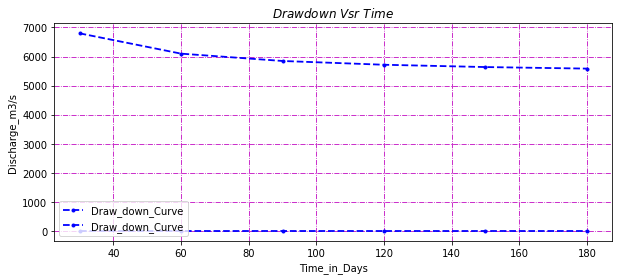

In [14]:
#2nd month drawdown S2 at edge D(-450,50) of the building pit which is the critical point
#s= 5 #[m] required drawdown
#rD1 = l #distance from  extration well at A
#rD2 = np.sqrt(l**2 + l**2) #distance from extration well at B
#rD3 = 2*xr+l #distance from injection well at A'
#rD4 = np.sqrt ((2*xr+l)**2+ l**2) #distance from injection well at B'

#print(round(rD1,2),round(rD2,2), round(rD3,2), round(rD4,2))
#if the discharge of previous month is continued for next month also i.e. 60 days
#month= np.array([0,1,2,3,4,5])
#discharge= np.array([0,1,2,3,4,5])

#for n, Qd in zip(month, discharge):
    #Qd= QD #[m3/day]
    #Qd = np.zeros_like(month)
    #time = 60 #[days]
    #uD1 = rD1 ** 2 * S / (4 * kD * time) 
   # uD2 = rD2 ** 2 * S / (4 * kD * time)
    #uD3 = rD3 ** 2 * S / (4 * kD * time)
   # uD4 = rD4 ** 2 * S / (4 * kD * time)
    #Using Superposition,
   # sd = Qd/(4 * np.pi * kD) * (W(uD1) + W(uD2)- W(uD3)- W(uD4)) # minus injecting wells 
   # sexcess= sd-s
   # print("Drawdown at month {:.0f} is s= {:.2f} m for extraction rate at Q= {:.0f} m3/day "\
   # .format (n,sd,Qd))
    
    # for compensating the excess drawdown, extraction rate must be changed for next month
    #tt=30
   #uD1 = rD1 ** 2 * S / (4 * kD * tt) 
   # uD2 = rD2 ** 2 * S / (4 * kD * tt)
   # uD3 = rD3 ** 2 * S / (4 * kD * tt)
   # uD4 = rD4 ** 2 * S / (4 * kD * tt)
    
    #Using Superposition,
 #   Qexcess =sexcess*(4 * np.pi * kD) / (W(uD1) + W(uD2)- W(uD3)- W(uD4)) # minus injecting wells
   # Qnew= Qd-Qexcess
   # n += n
  #  Qd =Qnew
  #  print("In order to maintain the drawdown s= {:.1f} m, the extraction rate for month {:.0f} should be Q = {:.0f} m3/day"\
  #  .format (s,n, Qnew))
#
import numpy as np 
import matplotlib.pyplot as plt
import scipy.special as sp #theis well function
from scipy.special import erfc
W= sp.exp1

# Aquifer properties
kD= 900  #[m2/d] is Transmissivity
S= 0.25  # [-] is Storativity
xr= 400  #[m] distance from the river
l= 50    #[m ]length of square
r0= 0.3  #[m] assumed well radius 
#t= 30    # [d] 1 month duration
s= 5     # [m] required drawdown

#Using Superposition,
#Flow QF for drawdown s(5m) at D(-450,50) 
rD1 = l #distance from  extration well at A
rD2 = np.sqrt(l**2 + l**2) #distance from extration well at B
rD3 = 2*xr+l               #distance from injection well at A'
rD4 = np.sqrt ((2*xr+l)**2+ l**2)  #distance from injection well at B'
print(round(rD1,2),round(rD2,2), round(rD3,2), round(rD4,2))
#uD1 = rD1 ** 2 * S / (4 * kD * t) 
#uD2 = rD2 ** 2 * S / (4 * kD * t)
#uD3 = rD3 ** 2 * S / (4 * kD * t)
#uD4 = rD4 ** 2 * S / (4 * kD * t)

Qd =[]
time = []
draw_down = []
days = [30,60,90,120,150,180]
for t in days:
    
    uD1 = rD1 ** 2 * S / (4 * kD * t) 
    uD2 = rD2 ** 2 * S / (4 * kD * t)
    uD3 = rD3 ** 2 * S / (4 * kD * t)
    uD4 = rD4 ** 2 * S / (4 * kD * t)
    
    QD1 = s*(4 * np.pi * kD) / (W(uD1) + W(uD2)- W(uD3)- W(uD4))
                    
    sd =(QD1/(4 * np.pi * kD)) * (W(uD1) + W(uD2)- W(uD3)- W(uD4))
    s = sd
    t = t 
    Qd.append(QD1)
    time.append(t)
    draw_down.append(s)

print (Qd)
print (draw_down)
print(time)
        
#plotting the curves
plt.figure(figsize=[10,4])

plt.plot(time, Qd, linestyle='--', linewidth=1.80, marker='.', color='b', label='Draw_down_Curve')
plt.plot(time, draw_down, linestyle='--', linewidth=1.80, marker='.', color='b', label='Draw_down_Curve')

plt.grid(color='m', linestyle='-.', linewidth=0.8)
plt.title('$Drawdown$ $Vsr$ $Time$')
plt.xlabel("Time_in_Days")
plt.ylabel("Discharge_m3/s")
plt.legend(loc = 3) 
    
    






#### The drawdown at the critical location for these period (from start of the wells until 1 year after end of the extraction)
(write formula )

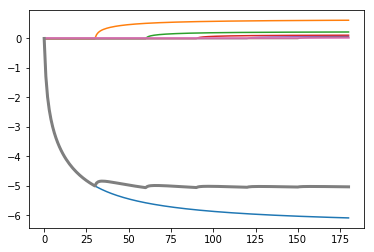

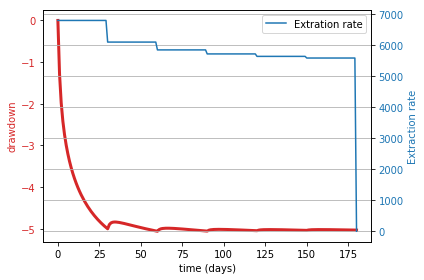

In [18]:
Q   = np.array([6797.28, 6099.48, 5847.55, 5717.77, 5638.68, 5585.44, 0]) #discharge rate for different months
times = np.array([0,30,60,90,120,150,180]) #time in days when the extraction rate is changed

ty = np.linspace (0, 180, 181) + 0.00001 #1.5 year is nearly 540 days # 0.00001  to prevent division by zero.
dQ = np.hstack((Q[0],np.diff(Q))) #Theis drawdown to compute drawdown at any moment

#aquifer properties as defined above
kD = 900 # [m2/day]
S = 0.25 # [-]

sy = np.zeros_like(ty) #drawdown when extraction is changed which is set to zero at first

for te, da in zip(times, dQ) :
    uD1 = rD1 ** 2 * S / (4 * kD * (ty[ty>=te]-te))
    uD2 = rD2 ** 2 * S / (4 * kD * (ty[ty>=te]-te))
    uD3 = rD3 ** 2 * S / (4 * kD * (ty[ty>=te]-te))
    uD4 = rD4 ** 2 * S / (4 * kD * (ty[ty>=te]-te)) 
    
    ds = np.zeros_like(ty) #setting initial values to zero
    ds[ty>=te] = -da / (4 * np.pi *kD) * (W(uD1) + W(uD2)- W(uD3)- W(uD4)) # filling the values for which t>=tt
       
    sy = sy + ds # add change due to this stage to total drawdown
    plt.plot(ty,ds)
plt.plot(ty, sy, lw=3, label='total drawdown')
    
a = np.zeros_like(ty)  # initially zero
for aa, te in zip(Q, times):
    a[ty>=te] = aa

#Plotting s and Q vs t in same graph

fig, ax = plt.subplots()  
color = 'tab:red'
ax.set_xlabel('time (days)')
ax.set_ylabel('drawdown', color=color)
ax.plot(ty, sy, linewidth=3, label='total drawdown',color=color)
ax.tick_params(axis='y', labelcolor=color)

ay = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ay.set_ylabel('Extraction rate', color=color)  # we already handled the x-label with ax1
ay.plot(ty, a, 'k', label='Extration rate', color=color)
ay.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.legend()
plt.show()

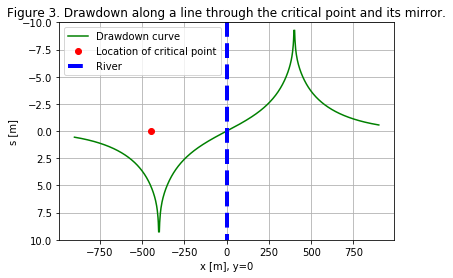

In [8]:
#Drawdown curve at many observation point through C ( a critical point)

# Aquifer properties
kD= 900  #[m2/d] is Transmissivity
S= 0.25  # [-] is Storativity
xr= 400  #[m] distance from the river
l= 50    #[m ]length of square
r0= 0.3  #[m] assumed well radius 
t= 30    # [d] 1 month duration
s= 5     # [m] required drawdown

x=np.linspace((-2)*(l+xr),2*(l+xr),901)
y  = np.zeros_like(x)

x1, y1 = -xr, 0  # location of extraction well 1 at B
x2, y2 = -xr, 50 # location of extraction well 2 at A
x3, y3 = +xr, 0  # location of mirror well 1 at B'
x4, y4 = +xr, 50  # location of mirror well 2 A'

#Taking critical point C(-450,0) 
rC1 = np.sqrt(((x1-x)**2)+((y1-0)**2)) #distance from  extration well at A
rC2 = np.sqrt(((x2-x)**2)+((y2-0)**2)) #distance from extration well at B
rC3 = np.sqrt(((x3-x)**2)+((y3-0)**2)) #distance from injection well at A'
rC4 = np.sqrt(((x4-x)**2)+((y4-0)**2)) #distance from injection well at B'

uC1 = rC1 ** 2 * S / (4 * kD * t) 
uC2 = rC2 ** 2 * S / (4 * kD * t)
uC3 = rC3 ** 2 * S / (4 * kD * t)
uC4 = rC4 ** 2 * S / (4 * kD * t)

#Using Superposition,
sc = QC /(4 * np.pi * kD)* (W(uC1) + W(uC2)- W(uC3)- W(uC4)) # minus injecting wells 


plt.title('Figure 3. Drawdown along a line through the critical point and its mirror.')
plt.xlabel('x [m], y=0')
plt.ylabel('s [m]')
plt.grid()
plt.plot(x, sc,"g-", label="Drawdown curve")
plt.plot(-450,0,'ro', label="Location of critical point") #critical point
plt.plot([0,0],[-10,10],'b--',lw=4, label="River" )
plt.ylim(10, -10) # invert the direction of the y-axis
plt.legend()

plt.show()

###  4. Compute as a function of time the flow from the river into the groundwater system. It is assumed that the groundwater head is initially uniform and equal to the river stage (water level in the river). Do this for the averate flow during the 6 month of building pit operation (ignore the variation in the extraction for simplicity).

6797.2899837977475


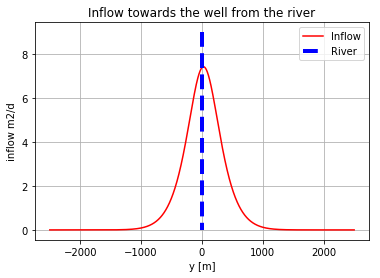

In [10]:
# We know from above that 
Q= QD #initial extraction rate assuming that there is no variation in extraction
T= 180 #[days] 6 months of building pit operation
xr= 400 #[meters] distance of wells to river shore
print(QD)

x1, y1 = -xr, 0  # location of extraction well 1 at B
x2, y2 = -xr, 50 # location of extraction well 2 at A
x3, y3 = +xr, 0  # location of mirror well 1 at B'
x4, y4 = +xr, 50  # location of mirror well 2 A

y = np.linspace(-2500,2500,2000)+0.00001
x  = np.zeros_like(y)

r1 = np.sqrt(((x1-x)**2)+((y1-y)**2)) #distance from  extration well at A
r2 = np.sqrt(((x2-x)**2)+((y2-y)**2)) #distance from extration well at B
r3 = np.sqrt(((x3-x)**2)+((y3-y)**2)) #distance from injection well at A'
r4 = np.sqrt(((x4-x)**2)+((y4-y)**2)) #distance from injection well at B'

u1 = r1 ** 2 * S / (4 * kD * t) 
u2 = r2 ** 2 * S / (4 * kD * t)
u3 = r3 ** 2 * S / (4 * kD * t)
u4 = r4 ** 2 * S / (4 * kD * t)

qr1= +Q/ (2* np.pi* r1)* np.exp(-u1)
qr2= +Q/ (2* np.pi* r2)* np.exp(-u2)
qr3= -Q/ (2* np.pi* r3)* np.exp(-u3)
qr4= -Q/ (2* np.pi* r4)* np.exp(-u4)

alpha1= np.arctan2((y-y1),(x-x1))
alpha2= np.arctan2((y-y2),(x-x2))
alpha3= np.arctan2((y-y3),(x-x3))
alpha4= np.arctan2((y-y4),(x-x4))

#the flow perpendicular to the shore is 
qpx1= qr1*np.cos(alpha1)+qr2* np.cos(alpha2)+ qr3* np.cos(alpha3)+ qr4* np.cos(alpha4)
qin =qpx1

plt.title('Inflow towards the well from the river')
plt.xlabel('y [m]')
plt.ylabel('inflow m2/d')
plt.grid()
plt.plot(y, qin, "r-", label= "Inflow")
plt.plot([0,0],[9,0], "b--",lw=4, label="River")
plt.legend()
plt.show()




### 5. After exactly 3 months, the water level in the river rises suddenly by 1 m and stays so during one month, after which it suddenly returns to its original level.  To what extent does this wave affect the water level in the building pit if no measure is taken?What must be the extraction during this month to guarantee that the building pit fulfills the required 5 m drawdown relative to the original water level? If both effects do not overlap, say so, and explain what you could to as building-pit owner to better counteract the effect of the wave  in the river stage on the head below the building pit.